In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist


In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [4]:
num= df.shape
print(num ,'\n' f'we have {num[0]} participents')

(678013, 12) 
we have 678013 participents


In [8]:
import skimpy as skim
skim.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 678013 │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0       ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ IDpol       │   0 │     0 │  2622000 │ 1642000 │        1 │ 1158000 │ 2272000 │ 4046000 │ 6114000 │ ▅▅▇▆▅▂ │  │
│ │ ClaimNb     │   0 │     0 │  0.05325 │  0.2401 │        0 │       0 │       0 │       0 │      16 │   ▇    │  │
│ │ Exposure    │   0 │     0 │   0.5288 │  0.3644 │ 0.002732 │    0.18 │    0.49 │    0.99 │    2.01 │  ▇▅▇   │  │
│ │ VehPower    │   0 │     0 │    6.455 │   2.051 │        4 │       5 │       6 │       7 │      15 │  ▇▇▂▁  │  │
│ │ VehAge      │   0 │     0 │    7.044 │   5.666 │        0 │       2 │       6 │      11 │     100 │   ▇    │  │
│ │ DrivAge     │   0 │     0 │     45.5 │   14.14 │       18 │      34 │      44 │      55 │     100 │ ▅▇▇▃▁  │  │
│ │ BonusMalus  │   0 │     0 │    59.76 │   15.64 │       50 │      50 │      50 │      64 │     230 │   ▇▁   │  │
│ │ Density     │   0 │     0 │     1792 │    3959 │        1 │      92 │     393 │    1658 │   27000 │   ▇    │  │
│ └─────────────┴─────┴───────┴──────────┴─────────┴──────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ shortest ┃ longest ┃ min    ┃ max     ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ Area     │  0 │    0 │ D        │ D       │ A      │ F       │             1 │             1 │      678013 │  │
│ │ VehBrand │  0 │    0 │ B6       │ B12     │ B1     │ B6      │          2.31 │             1 │      678013 │  │
│ │ VehGas   │  0 │    0 │ Diesel   │ Regular │ Diesel │ Regular │          6.51 │             1 │      678013 │  │
│ │ Region   │  0 │    0 │ R82      │ R82     │ R11    │ R94     │             3 │             1 │      678013 │  │
│ └──────────┴────┴──────┴──────────┴─────────┴────────┴─────────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [31]:
#Required Columns
da = df.loc[: , ['Exposure' ,'VehPower' , 'VehAge', 'DrivAge', 'VehGas' ,'Density',]]
da.head()

,Exposure,VehPower,VehAge,DrivAge,VehGas,Density
0,0.10,5,0,55,Regular,1217
1,0.77,5,0,55,Regular,1217
2,0.75,6,2,52,Diesel,54
3,0.09,7,0,46,Diesel,76
4,0.84,7,0,46,Diesel,76


In [32]:
da.info() , da.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Exposure  678013 non-null  float64
 1   VehPower  678013 non-null  int64  
 2   VehAge    678013 non-null  int64  
 3   DrivAge   678013 non-null  int64  
 4   VehGas    678013 non-null  object 
 5   Density   678013 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 31.0+ MB


(None,
             Exposure       VehPower         VehAge        DrivAge  \
 count  678013.000000  678013.000000  678013.000000  678013.000000   
 mean        0.528750       6.454631       7.044265      45.499122   
 std         0.364442       2.050906       5.666232      14.137444   
 min         0.002732       4.000000       0.000000      18.000000   
 25%         0.180000       5.000000       2.000000      34.000000   
 50%         0.490000       6.000000       6.000000      44.000000   
 75%         0.990000       7.000000      11.000000      55.000000   
 max         2.010000      15.000000     100.000000     100.000000   
 
              Density  
 count  678013.000000  
 mean     1792.422405  
 std      3958.646564  
 min         1.000000  
 25%        92.000000  
 50%       393.000000  
 75%      1658.000000  
 max     27000.000000  )

In [33]:
da.columns = ['Exposure' , 'Vehicle Power' ,"Vehicle Age",  'Driver Age' , 'VehicalGas' ,'Density']
da["Vehicle Power"].value_counts()

Vehicle Power
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: count, dtype: int64

## Univariate Analysis

In [34]:
da.isna().sum()

Exposure         0
Vehicle Power    0
Vehicle Age      0
Driver Age       0
VehicalGas       0
Density          0
dtype: int64

In [35]:
#summary statistics for the quantative variables
da.describe()

,Exposure,Vehicle Power,Vehicle Age,Driver Age,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.528750,6.454631,7.044265,45.499122,1792.422405
std,0.364442,2.050906,5.666232,14.137444,3958.646564
min,0.002732,4.000000,0.000000,18.000000,1.000000
25%,0.180000,5.000000,2.000000,34.000000,92.000000
50%,0.490000,6.000000,6.000000,44.000000,393.000000
75%,0.990000,7.000000,11.000000,55.000000,1658.000000
max,2.010000,15.000000,100.000000,100.000000,27000.000000


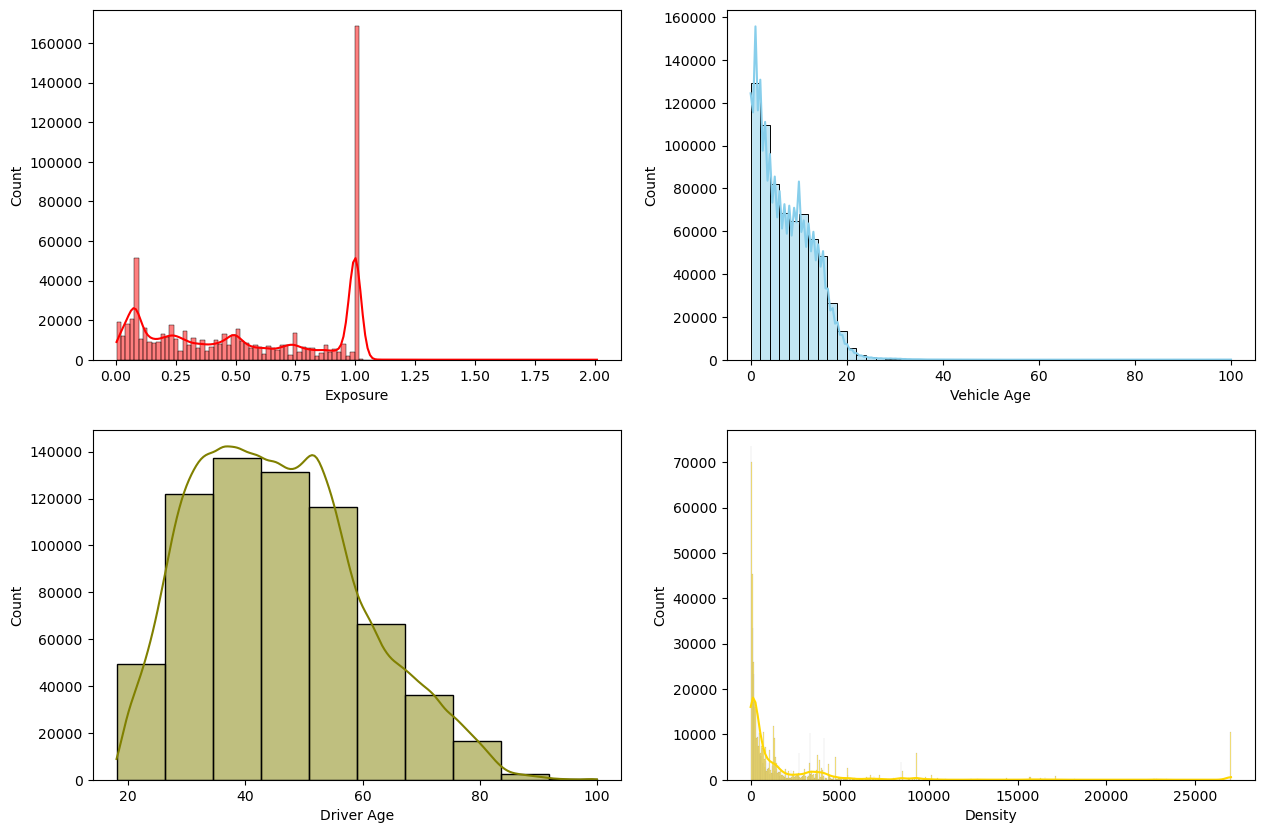

In [38]:
# creating histogram for quantitative variables
fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= da, x="Exposure", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= da, x="Vehicle Age", bins = 50, kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= da, x="Driver Age", kde=True, bins = 10, color="olive", ax=axs[1,0])
sns.histplot(data= da, x="Density", kde=True, color="gold", ax=axs[1,1])

plt.show()

Thes different distributtions of different variables can be seen. Exposure is more or less uniform but has a major spike in the end. Vehicle age shows a decreasing distribution. Driver age has a relatively normal distribution with slight right skewness. 

## Bivariate Analysis

In [39]:
corr_value = da['Exposure'].corr(da['Vehicle Age'], method='pearson')
print("Pearson correlation between Exposure and Vehicle Age:", corr_value)


Pearson correlation between Exposure and Vehicle Power: 0.15155421720487597


In [40]:
spearman_value = da['Exposure'].corr(da['Vehicle Age'], method='spearman')
print("Spearman correlation between Exposure and Vehicle Power:", spearman_value)

Spearman correlation between Exposure and Vehicle Power: 0.18416138584790526


In [41]:

contingency_table = pd.crosstab(da['Vehicle Age'], da['Driver Age'])
print(contingency_table)

Driver Age   18   19   20   21   22   23   24   25   26    27   ...  91   92   \
Vehicle Age                                                     ...             
0             25   79  117  190  343  498  575  655  769   820  ...    1    0   
1             15   59  148  208  302  515  751  875  988  1139  ...    2    3   
2              9   68   96  168  273  318  532  724  864   971  ...    6    1   
3             14   53  107  185  254  335  408  564  765   899  ...    6    3   
4             21   64  137  170  275  324  434  528  649   763  ...    3    2   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
83             0    0    0    0    0    0    0    0    0     0  ...    0    0   
84             0    0    0    0    0    0    0    0    0     0  ...    0    0   
85             0    0    0    0    0    0    0    0    0     0  ...    0    0   
99             0    2    0    0    0    2    0    0    0     0  ...    0    0   
100            0    0    2  

In [42]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Square: 22789.907137948263
p-value: 0.0
Degrees of Freedom: 6314
Expected frequencies:
 [[6.36990323e+01 2.03700649e+02 3.13044977e+02 ... 4.25795671e-01
  5.96113939e+00 2.55477402e-01]
 [7.86421971e+01 2.51486812e+02 3.86482241e+02 ... 5.25683136e-01
  7.35956390e+00 3.15409882e-01]
 [6.52269971e+01 2.08586868e+02 3.20554066e+02 ... 4.36009339e-01
  6.10413075e+00 2.61605603e-01]
 ...
 [1.10322368e-03 3.52795595e-03 5.42172495e-03 ... 7.37448987e-06
  1.03242858e-04 4.42469392e-06]
 [2.53741447e-02 8.11429869e-02 1.24699674e-01 ... 1.69613267e-04
  2.37458574e-03 1.01767960e-04]
 [2.75805921e-02 8.81988988e-02 1.35543124e-01 ... 1.84362247e-04
  2.58107145e-03 1.10617348e-04]]


Thus bivariate analysis was performed and the results obtained. 